In [ ]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
from tensorflow.keras.models import Sequential


import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/SPAM_detection.csv')


In [ ]:
df.head(3)

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [ ]:
maxlen=5
all_char = ''

for idx, row in df.iterrows():
    
      all_char += df.loc[idx, "Message"]

chars = (sorted(list(set(all_char))))

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print('total chars:', len(chars))



total chars: 118


In [ ]:
sequences = df['Message']
X = np.zeros((len(sequences), maxlen, len(chars)), dtype=np.uint8)
Y = np.array(df['category_val'])


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

In [ ]:
model = Sequential()

model.add(tfkl.LSTM(64, input_shape=(maxlen, len(chars))))
model.add(tfkl.Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                46848     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 46,913
Trainable params: 46,913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.RMSprop(lr=0.01),metrics=['accuracy'])
results = model.fit(x_train, y_train, epochs=20, batch_size=200)

Epoch 1/20
19/19 [==============================] - 0s 16ms/step - loss: 0.4435 - accuracy: 0.8658
Epoch 2/20
19/19 [==============================] - 0s 15ms/step - loss: 0.4011 - accuracy: 0.8658
Epoch 3/20
19/19 [==============================] - 0s 15ms/step - loss: 0.4044 - accuracy: 0.8658
Epoch 4/20
19/19 [==============================] - 0s 15ms/step - loss: 0.3990 - accuracy: 0.8658
Epoch 5/20
19/19 [==============================] - 0s 15ms/step - loss: 0.3980 - accuracy: 0.8658
Epoch 6/20
19/19 [==============================] - 0s 15ms/step - loss: 0.3961 - accuracy: 0.8658
Epoch 7/20
19/19 [==============================] - 0s 17ms/step - loss: 0.3978 - accuracy: 0.8658
Epoch 8/20
19/19 [==============================] - 0s 16ms/step - loss: 0.3973 - accuracy: 0.8658
Epoch 9/20
19/19 [==============================] - 0s 15ms/step - loss: 0.3953 - accuracy: 0.8658
Epoch 10/20
19/19 [==============================] - 0s 15ms/step - loss: 0.3977 - accuracy: 0.8658
Epoch 11/

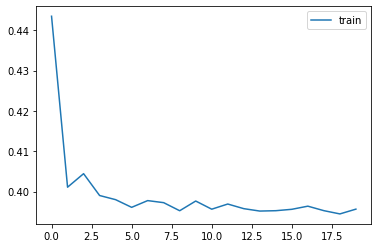

In [ ]:
import matplotlib.pyplot as plt

plt.plot(results.history["loss"])
plt.legend(labels=["train", "val"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Probability')

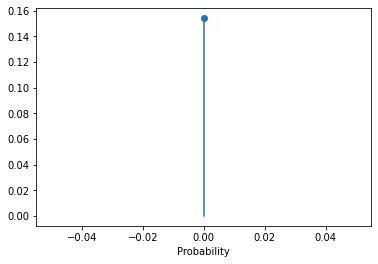

In [ ]:
plt.stem(model.predict(x_test)[9, :])
plt.xlabel("Digit")
plt.xlabel("Probability")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from keras.callbacks import Callback
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Embedding, Dropout
from keras.layers import Conv1D, MaxPool1D, Flatten, Concatenate
from keras.models import Model
from keras.utils.vis_utils import plot_model

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split( X, Y, test_size=0.33, random_state=42)

In [ ]:
embed_size = 300
max_words = 50000
maxlen = 100 # 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
word_index = tokenizer.word_index
X_train = pad_sequences(X_train, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

In [ ]:
embed = np.zeros(shape=[max_words, embed_size])
for word, idx in word_index.items():
    if idx >= max_words: continue
    vector = embedding_dict.get(word)
    if vector is not None:
        embed[idx] = vector

In [ ]:
def create_cnn(filter_sizes, strides, num_filters, embed_train=False, dropout=0.2, plot=False):
    sequence_input = Input(shape=(maxlen,), dtype='int32')
    x = Embedding(max_words, embed_size, weights=[embed_mat], trainable=embed_train)(sequence_input)
    conv_layers = []
    maxpool_layers = []
    for i in range(len(filter_sizes)):
        conv_layers.append(Conv1D(num_filters, strides=strides[i], padding='same', kernel_size=(filter_sizes[i]),
                                 kernel_initializer='he_normal', activation='relu')(x))
        pool_size = int((maxlen-(filter_sizes[i]*2))/strides[i])
        maxpool_layers.append(MaxPool1D(pool_size=pool_size, strides=strides[i])(conv_layers[i]))
    if len(maxpool_layers)==1:
        z = maxpool_layers[0]
    else:
        z = Concatenate(axis=1)(maxpool_layers)
  
    z = Flatten()(z)
    z = Dropout(dropout)(z)
    z = Dense(64, activation='relu')(z)
    preds = Dense(1, activation='sigmoid')(z)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
  
    return model

In [ ]:
threshold = 0.35
class F1Evaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()
        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            y_pred = (y_pred > threshold).astype(int)
            score = f1_score(self.y_val, y_pred)
            print("\n F1 Score - epoch: %d - score: %.6f \n" % (epoch+1, score))
            
F1_Score = F1Evaluation(validation_data=(X_val, y_val), interval=1)

In [ ]:

filter_sizes = [1,3,3,4]
strides = [1,3,2,4]
epochs = 8
batch_size = 1024
num_filters = 20
dropout = 0.3
embed_train = False
cnn = create_cnn(filter_sizes, strides, num_filters, embed_train=embed_train, dropout=dropout)
history = cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs,
                  batch_size=batch_size, callbacks=[F1_Score])

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 100, 300)     15000000    input_8[0][0]                    
__________________________________________________________________________________________________
conv1d_33 (Conv1D)              (None, 100, 20)      6020        embedding_11[0][0]               
__________________________________________________________________________________________________
conv1d_34 (Conv1D)              (None, 34, 20)       18020       embedding_11[0][0]               
______________________________________________________________________________________

code reference https://www.kaggle.com/bmmidei/using-convolution-for-nlp-text-classification